In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import time, timedelta

In [2]:
garmin_data = pd.read_csv('garmin_activities.csv')

In [3]:
garmin_data.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Avg Stroke Rate,Min Temp,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Trail Running,12/7/2024 9:08,False,Kutina Trail Running,43.43,"2,940",6:35:04,129,163,4.2,...,--,--,No,04:51.1,44,--,6:21:09,6:35:04,100,490
1,Trail Running,11/30/2024 8:58,False,Kutina Trail Running,11.05,808,1:30:51,129,150,2.8,...,--,--,No,00:19.4,12,--,1:29:47,1:34:30,99,159
2,Hiking,11/24/2024 10:54,False,Kutina Hiking,6.81,505,1:59:05,95,127,0.7,...,--,--,No,1:59:05,1,--,1:44:03,2:04:22,178,416
3,Trail Running,11/24/2024 8:19,False,Kutina Trail Running,11.05,797,1:24:47,131,151,2.9,...,--,--,No,00:19.6,12,--,1:24:27,1:24:47,99,169
4,Trail Running,11/17/2024 10:31,False,Kutina Trail Running,21.1,"1,501",2:44:27,133,153,3.4,...,--,--,No,00:43.4,22,--,2:43:30,2:44:27,100,176


In [4]:
garmin_data.tail()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Avg Stroke Rate,Min Temp,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
306,Running,12/24/2022 15:59,False,Kutina Running,16.18,"1,031",1:38:01,148,163,3.9,...,--,--,No,00:55.7,17,--,1:37:58,1:38:01,102,217
307,Running,12/23/2022 13:18,False,Kutina Running,16.08,"1,106",1:26:20,171,192,5.0,...,--,--,No,00:22.3,17,--,1:26:15,1:26:20,107,218
308,Running,12/18/2022 11:34,False,Kutina Running,10.33,636,0:50:53,173,197,5.0,...,--,--,No,01:22.2,11,--,0:50:48,0:50:53,110,226
309,Walking,12/13/2022 14:19,False,Kutina Walking,2.53,143,0:29:35,106,121,0.6,...,--,--,No,05:55.8,3,--,0:29:17,0:29:35,109,123
310,Walking,12/7/2022 15:02,False,Kutina Walking,3.49,204,0:44:22,103,134,0.6,...,--,12,No,00:01.3,10,27,0:43:23,0:44:28,107,141


In [5]:
garmin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Type             311 non-null    object 
 1   Date                      311 non-null    object 
 2   Favorite                  311 non-null    bool   
 3   Title                     311 non-null    object 
 4   Distance                  311 non-null    object 
 5   Calories                  311 non-null    object 
 6   Time                      311 non-null    object 
 7   Avg HR                    311 non-null    int64  
 8   Max HR                    311 non-null    int64  
 9   Aerobic TE                311 non-null    float64
 10  Avg Run Cadence           311 non-null    object 
 11  Max Run Cadence           311 non-null    object 
 12  Avg Pace                  311 non-null    object 
 13  Best Pace                 311 non-null    object 
 14  Total Asce

In [6]:
garmin_data.describe()

,Avg HR,Max HR,Aerobic TE,Training Stress Score®,Number of Laps
count,311.000000,311.000000,311.000000,311.0,311.000000
mean,146.090032,165.527331,3.311254,0.0,11.813505
std,17.386079,13.510034,0.958107,0.0,9.530458
min,72.000000,75.000000,0.000000,0.0,1.000000
25%,140.000000,160.000000,3.000000,0.0,7.000000
50%,151.000000,166.000000,3.400000,0.0,11.000000
75%,157.000000,173.000000,3.900000,0.0,13.000000
max,176.000000,197.000000,5.000000,0.0,103.000000


In [7]:
garmin_data['Activity Type'].value_counts()

Activity Type
Running                201
Trail Running           49
Hiking                  17
Cycling                 15
Pool Swim               12
Cardio                   7
Walking                  6
Open Water Swimming      4
Name: count, dtype: int64

In [8]:
running_data = garmin_data[garmin_data['Activity Type'].isin(['Running', 'Trail Running'])].reset_index()

In [9]:
running_data.columns

Index(['index', 'Activity Type', 'Date', 'Favorite', 'Title', 'Distance',
       'Calories', 'Time', 'Avg HR', 'Max HR', 'Aerobic TE', 'Avg Run Cadence',
       'Max Run Cadence', 'Avg Pace', 'Best Pace', 'Total Ascent',
       'Total Descent', 'Avg Stride Length', 'Avg Vertical Ratio',
       'Avg Vertical Oscillation', 'Avg Ground Contact Time', 'Avg GAP',
       'Normalized Power® (NP®)', 'Training Stress Score®', 'Avg Power',
       'Max Power', 'Total Strokes', 'Avg. Swolf', 'Avg Stroke Rate',
       'Min Temp', 'Decompression', 'Best Lap Time', 'Number of Laps',
       'Max Temp', 'Moving Time', 'Elapsed Time', 'Min Elevation',
       'Max Elevation'],
      dtype='object')

In [10]:
running_data = running_data.drop(['Favorite', 'Training Stress Score®', 'Total Strokes', 'Avg. Swolf', 'Avg Stroke Rate',
       'Min Temp', 'Max Temp', 'index', 'Decompression'], axis=1)

In [11]:
running_data.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,...,Avg GAP,Normalized Power® (NP®),Avg Power,Max Power,Best Lap Time,Number of Laps,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Trail Running,12/7/2024 9:08,Kutina Trail Running,43.43,"2,940",6:35:04,129,163,4.2,137,...,8:48,208,178,382,04:51.1,44,6:21:09,6:35:04,100,490
1,Trail Running,11/30/2024 8:58,Kutina Trail Running,11.05,808,1:30:51,129,150,2.8,145,...,7:43,232,214,375,00:19.4,12,1:29:47,1:34:30,99,159
2,Trail Running,11/24/2024 8:19,Kutina Trail Running,11.05,797,1:24:47,131,151,2.9,151,...,7:11,242,229,426,00:19.6,12,1:24:27,1:24:47,99,169
3,Trail Running,11/17/2024 10:31,Kutina Trail Running,21.1,"1,501",2:44:27,133,153,3.4,149,...,7:19,235,222,409,00:43.4,22,2:43:30,2:44:27,100,176
4,Trail Running,11/13/2024 8:19,Kutina Trail Running,21.11,"1,474",2:43:56,130,150,3.3,147,...,7:20,237,222,390,00:41.6,22,2:42:55,2:45:18,110,172


In [12]:
pace_list = running_data['Avg Pace'].str.split(':').tolist()

for pace in pace_list:
    try:
        pace.pop(2)   #removes the 2nd index
    except IndexError:
        continue

pace_value = []

for minutes, seconds in pace_list:
    value = round(int(minutes) + int(seconds)/60, 2)
    pace_value.append(value)

running_data['Pace Value'] = pace_value

In [13]:
GAP_list = running_data['Avg GAP'].str.split(':').tolist()

for GAP in GAP_list:
    try:
        GAP.pop(2)   #removes the 2nd index
    except IndexError:
        continue

GAP_value = []

for minutes, seconds in GAP_list:
    GAP_value.append(round(int(minutes) + int(seconds)/60, 2))

running_data['GAP Value'] = GAP_value

In [14]:
running_data['Total Ascent'] = running_data['Total Ascent'].replace('--', '0').astype('int64')

In [15]:
time_in_minutes = []

for time in running_data['Time'].str.split(':'):
    time_in_minutes.append(round(int(time[0])*60 + int(time[1]) + int(time[2])/60, 2))

In [16]:
running_data['Time in Minutes'] = time_in_minutes

In [17]:
training_data = running_data[['Time in Minutes', 'GAP Value', 'Distance', 'Total Ascent', 'Avg HR', 'Max HR', 'Normalized Power® (NP®)', 'Aerobic TE']]
training_data = running_data[['Time in Minutes', 'GAP Value', 'Distance', 'Total Ascent', 'Avg HR', 'Max HR', 'Normalized Power® (NP®)', 'Aerobic TE']].copy()

In [18]:
training_data['Distance'] = training_data['Distance'].astype('float')
training_data['Normalized Power® (NP®)'] = training_data['Normalized Power® (NP®)'].astype('int64')

In [19]:
training_data

,Time in Minutes,GAP Value,Distance,Total Ascent,Avg HR,Max HR,Normalized Power® (NP®),Aerobic TE
0,395.07,8.80,43.43,740,129,163,208,4.2
1,90.85,7.72,11.05,307,129,150,232,2.8
2,84.78,7.18,11.05,318,131,151,242,2.9
3,164.45,7.32,21.10,586,133,153,235,3.4
4,163.93,7.33,21.11,568,130,150,237,3.3
...,...,...,...,...,...,...,...,...
245,88.92,5.48,16.07,202,156,172,287,4.4
246,87.08,5.40,16.00,176,159,173,288,4.8
247,98.02,6.03,16.18,127,148,163,259,3.9
248,86.33,5.33,16.08,173,171,192,293,5.0


In [20]:
training_data = training_data[training_data['GAP Value'] <= 10]

In [21]:
shuffled_data = training_data.sample(frac=1, random_state=42).reset_index(drop=True)

x = shuffled_data[['Time in Minutes', 'GAP Value', 'Distance', 'Total Ascent', 'Avg HR', 'Max HR', 'Normalized Power® (NP®)']]
y = shuffled_data['Aerobic TE']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2, 
    shuffle=True,  # Enabled by default in sklearn
    random_state=42
)

In [24]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

model = Ridge(alpha=0.1)
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(f"MAE: {mean_absolute_error(y_test, preds):.2f}")

MAE: 0.16


In [29]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=200, learning_rate=0.05)
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(f"MAE: {mean_absolute_error(y_test, preds):.2f}")

MAE: 0.15


Text(0, 0.5, 'Residuals')

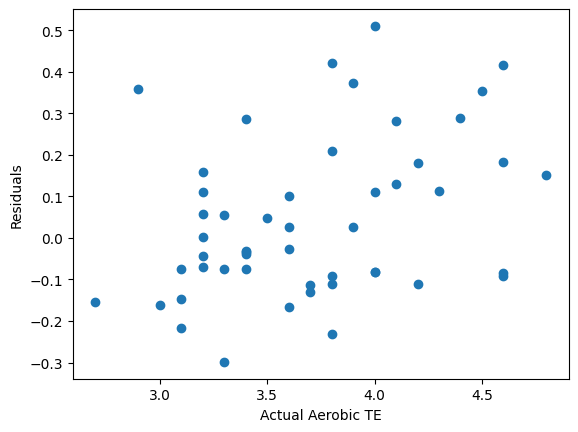

In [30]:
residuals = y_test - preds  
plt.scatter(y_test, residuals)  
plt.xlabel("Actual Aerobic TE")  
plt.ylabel("Residuals") 